In [1]:
import pandas as pd
data=pd.read_csv('startup_final_dataset.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   relationships       923 non-null    int64  
 1   funding_rounds      923 non-null    int64  
 2   funding_total_usd   923 non-null    int64  
 3   milestones          923 non-null    int64  
 4   has_VC              923 non-null    int64  
 5   has_angel           923 non-null    int64  
 6   avg_participants    923 non-null    float64
 7   status              923 non-null    object 
 8   startup_age         923 non-null    int64  
 9   execution_velocity  923 non-null    float64
 10  rounds_per_year     923 non-null    float64
dtypes: float64(3), int64(7), object(1)
memory usage: 79.4+ KB


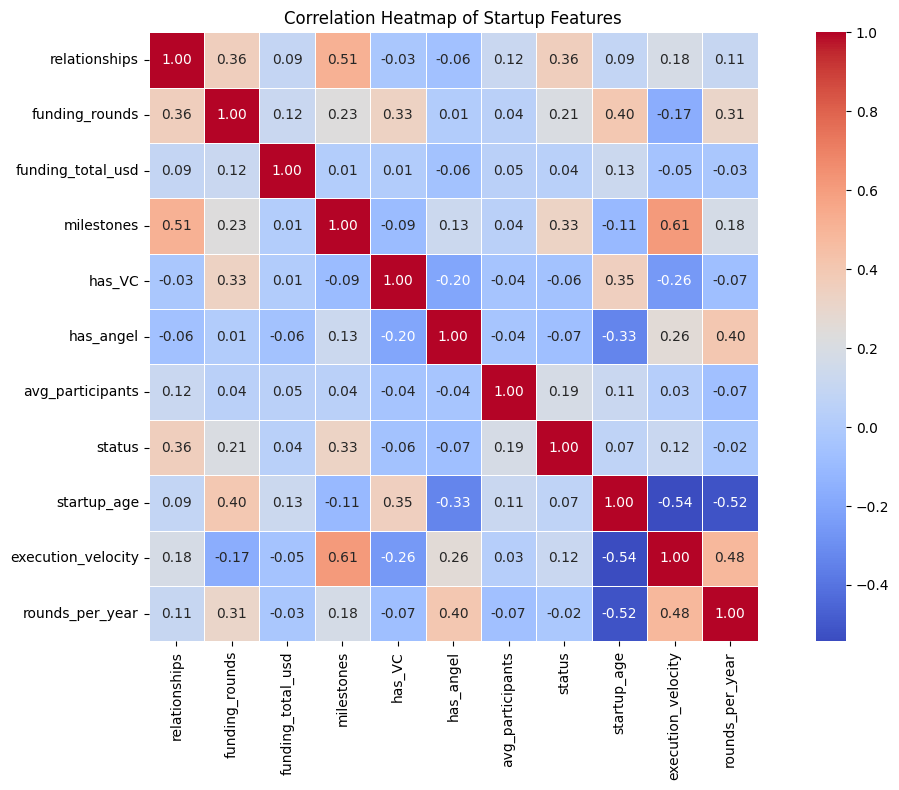

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If status is still categorical, encode it first
data["status"] = data["status"].map({"acquired": 1, "closed": 0})

# Compute correlation matrix
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Startup Features")
plt.tight_layout()
plt.show()


In [4]:
data["status"].value_counts(normalize=True)


status
1    0.646804
0    0.353196
Name: proportion, dtype: float64

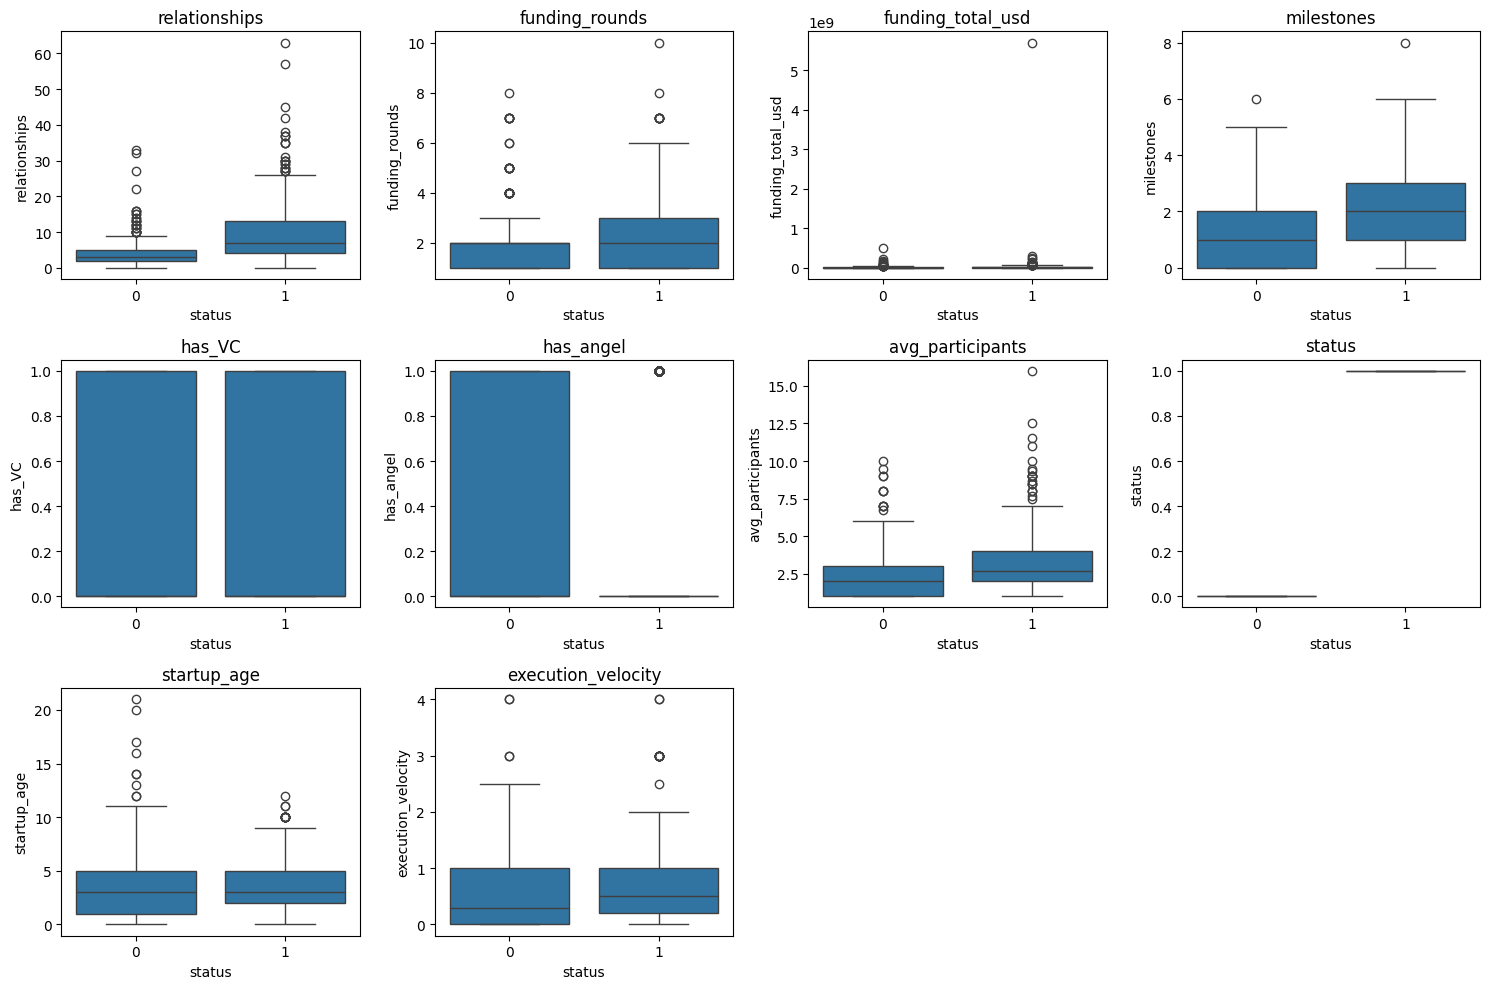

In [5]:
plt.figure(figsize=(15,10))

for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x="status", y=col, data=data)
    plt.title(col)

plt.tight_layout()
plt.show()


In [7]:
# Select numeric columns only
import numpy as np
numeric_cols = data.drop("status", axis=1).select_dtypes(include=np.number).columns

# Compute skewness
skew_values = data[numeric_cols].skew().sort_values(ascending=False)
print("Skewness of features:\n")
print(skew_values)


Skewness of features:

funding_total_usd     29.152461
relationships          2.329961
rounds_per_year        2.274175
execution_velocity     1.952371
avg_participants       1.767554
funding_rounds         1.356917
startup_age            1.252314
has_angel              1.128435
has_VC                 0.743076
milestones             0.577378
dtype: float64


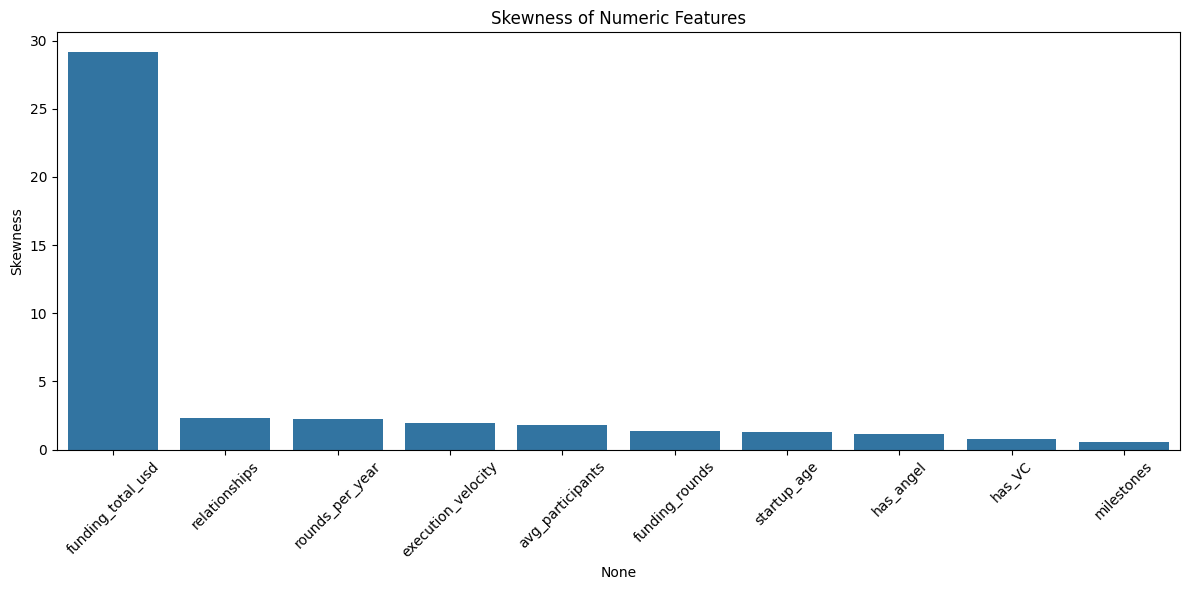

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=skew_values.index, y=skew_values.values)
plt.xticks(rotation=45)
plt.ylabel("Skewness")
plt.title("Skewness of Numeric Features")
plt.tight_layout()
plt.show()


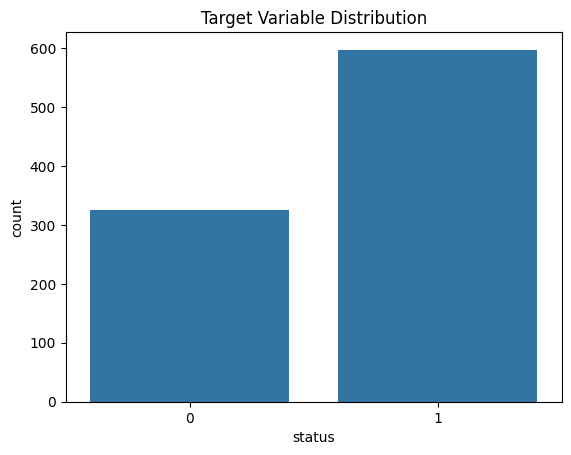

In [9]:
sns.countplot(x="status", data=data)
plt.title("Target Variable Distribution")
plt.show()


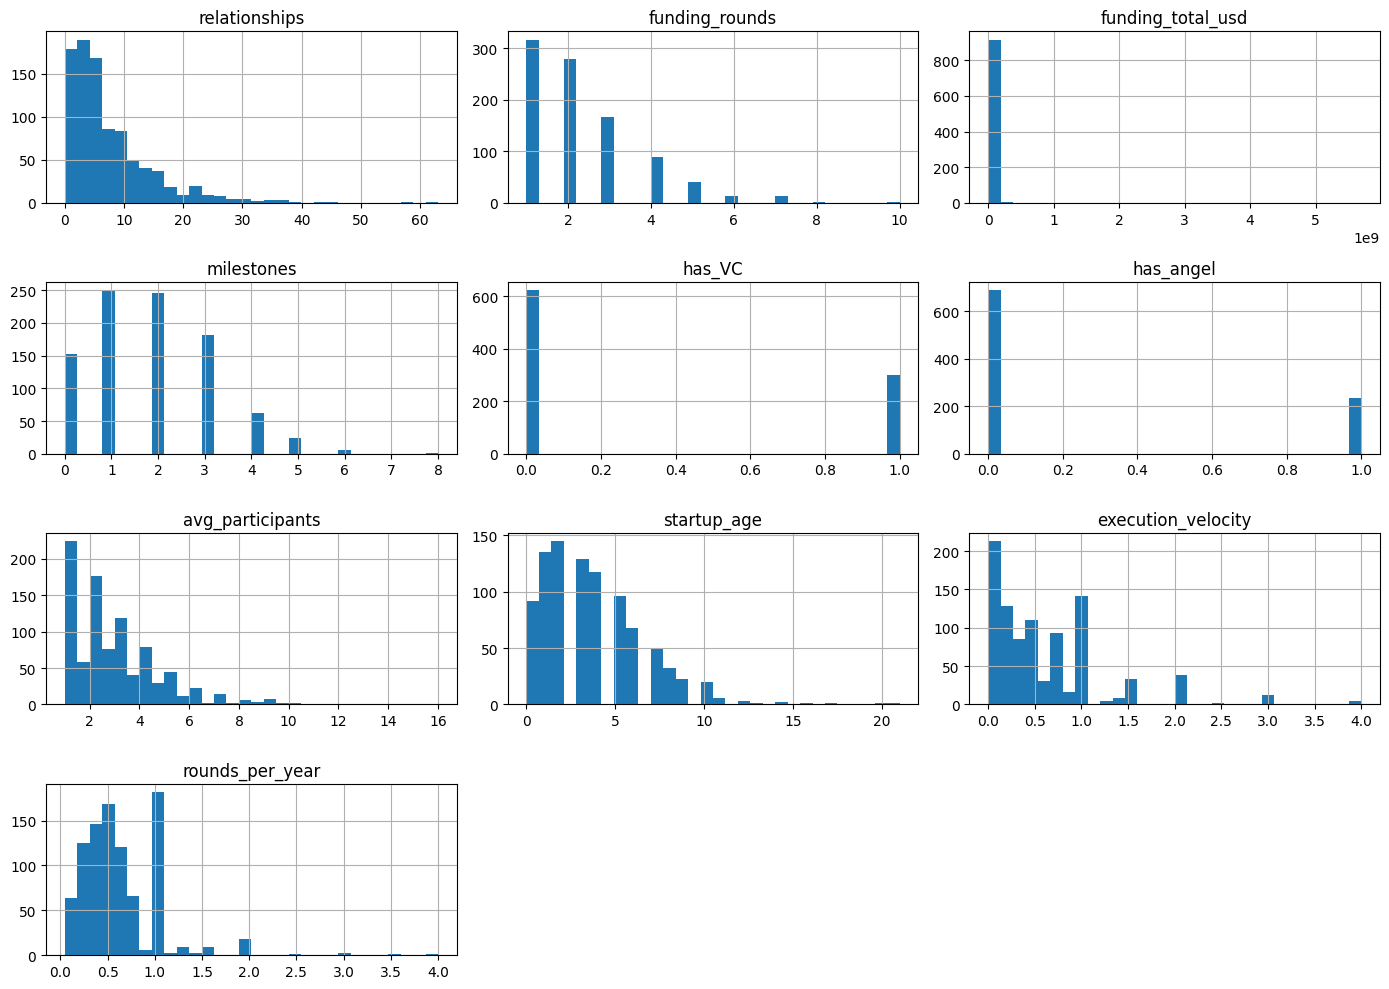

In [10]:
numeric_cols = data.drop("status", axis=1).select_dtypes(include=np.number).columns
data[numeric_cols].hist(figsize=(14,10), bins=30)
plt.tight_layout()
plt.show()
